In [1]:
!apt-get install -qq libgdal-dev libproj-dev
!pip install --no-binary shapely shapely --force
!pip install cartopy

import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 199 kB 15.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for shapely: filename=Shapely-1.8.4-cp37-cp37m-linux_x86_64.whl size=669465 sha256=cd48b73a208866b06b60ae5ad3e5f80d3d9e69a6990a454870076288f7751b38
  Stored in directory: /root/.cache/pip/wheels/0b/f0/55/139a0ab07fbf91378f9b7062842aee4d4bb3566a1fc30ac7a4
Successfully built shapely
  Attempting uninstall: shapely
    Found existing installation: Shapely 1.8.4
    Uninstalling Shapely-1.8.4:
      Successfully uninstalled Shapely-1.8.4
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.8 MB 12.0 MB/s 
  Installing build dependencies ... done
  Getting requirement

In [ ]:
import pandas
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cio
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np
import math as math

#**Estaciones en Colombia para Analizar:**#
##**Precipitación total mensual y temperaturas máximas y mínimas:**##
##ANDINA: 
###1. Aguas Claras, Aguachica, Cesar: 1990/1/1###
###2. El Centro, Barrancabermeja, Santander: 1990/1/1###
###3. Jardin Botanico, Bogotá, Bogotá: 1990/1/1###
###4. Universidad Industrial de Santander, Bucaramanga, Santander: 1990/1/1###
###5. Cesari, Caucasia, Antioquia: 1990/1/1###
###6. Santa Isabel, Cúcuta, Norte de Santander: 1990/1/1###
###7. Tibaitatá, Mosquera, Cundinamarca: 1990/1/1###
###8. La Julia, Neiva, Huila: 1990/1/1###
###9. Botana, Pasto, Nariño: 1990/1/1###
###10. Aeropuerto Guillermo León Valencia, Popayán, Cauca: 1990/1/1###
###11. Aeropuerto Puerto Berrío, Puerto Berrío, Antioquia: 1990/1/1###
###12. Aeropuerto Palenquero, Puerto Salgar, Cundinamarca: 1990/1/1###
###13. Canafisanto, Santa Fe de Antioquia, Antioquia: 1990/1/1###

##AMAZONÍA: 
###14. Macagual, Florencia, Caquetá: 1990/12/1###
###15. Puerto Inírida, Inírida, Guainía: 1990/1/1###
###16. La Chorrera, Área No Municipalizada La Chorrera (Leticia), Amazonas: 1990/1/1###
###17. Aeropuerto Alfredo Vasquez Cobo, Leticia, Amazonas: 1990/1/1###
###18. Mitú, Mitú, Vaupés: 1990/1/1###
###19. Puerto Leguizamo, Puerto Leguizamo, Putumayo: 1990/1/1###
###20. San José del Guaviare, San José del Guaviare, Guaviare: 1990/1/1###
###21. San Vicente del Caguán, San Vicente del Caguán, Caquetá: 1990/1/1###

##PACÍFICA: 
###22. Panamericana, Bahía Solano, Chocó: 1990/1/1###
###23. Bajo Calima, Buenaventura, Valle del Cauca: 1990/1/1###
###24. Noanama, Medio San Juan, Chocó: 1990/1/1###
###25. San José Palmar, Novita, Chocó: 1990/1/1###
###26. Aeropuerto El Carnaro, Quibdó, Chocó: 1990/1/1###
###27. La Teresita, Riosucio, Santander: 1990/1/1###
###28. Aeropuerto La Florida, San Andrés de Tumaco, Nariño: 1990/1/1###

##CARIBE: 
###29. Las Flores, Barranquilla, Atlántico: 1990/1/1###
###30. Escuela Naval CIOH, Cartagena de Indias, Bolívar: 1990/1/1###
###31. Lorica, Lorica, Córdoba: 1990/1/1###
###32. Manaure, Manaure, La Guajira: 1990/1/1###
###33. El Mellito, Necocli, Antioquia: 1990/1/1###
###34. Los Alamos, San Sebastián de Buenavista, Magdalena: 1990/1/1###
###35. San Lorenzo, Santa Marta, Córdoba: 1990/1/1###
###36. Turbo, Turbo, Antioquia: 1990/1/1###
###37. Guaymaral, Valledupar, Cesar: 1990/1/1###

##ORINOQUÍA: 
###38. Aeropuerto Santiago Perez, Arauca, Arauca: 1990/1/1###
###39. Las Gaviotas, Cumaribo, Vichada: 1990/1/1###
###40. La Cooperativa, Fuente de Oro, Meta: 1990/1/1###
###41. Modulos, Orocue, Casanare: 1990/1/1###
###42. Aeropuerto Puerto Carreño, Puerto Carreño, Vichada: 1990/1/1###
###43. Saravena, Saravena, Guainía: 1990/1/1###
###44. Tame, Tame, Arauca: 1990/1/1###
###45. Aeropuerto de Yopal, Yopal, Casanare: 1990/1/1###

##INSULAR: 
###46. Gorgona, Guapi, Cauca: 1990/1/1###
###47. Islas del Rosario, Cartagena de Indias, Bolívar: 1990/1/1###
###48. Malpelo, Buenaventura, Valle del Cauca: 1990/1/1###
###49. Aeropuerto Sesquicentenario, San Andrés, Archipiélago de San Andrés, Providencia y Santa Catalina: 1990/1/1###
###50. Aeropuerto El Embrujo, Santa Catalina, Archipiélago de San Andrés, Providencia y Santa Catalina: 1990/1/1###

#Graficar los puntos de estaciones en Colombia que se analizaron

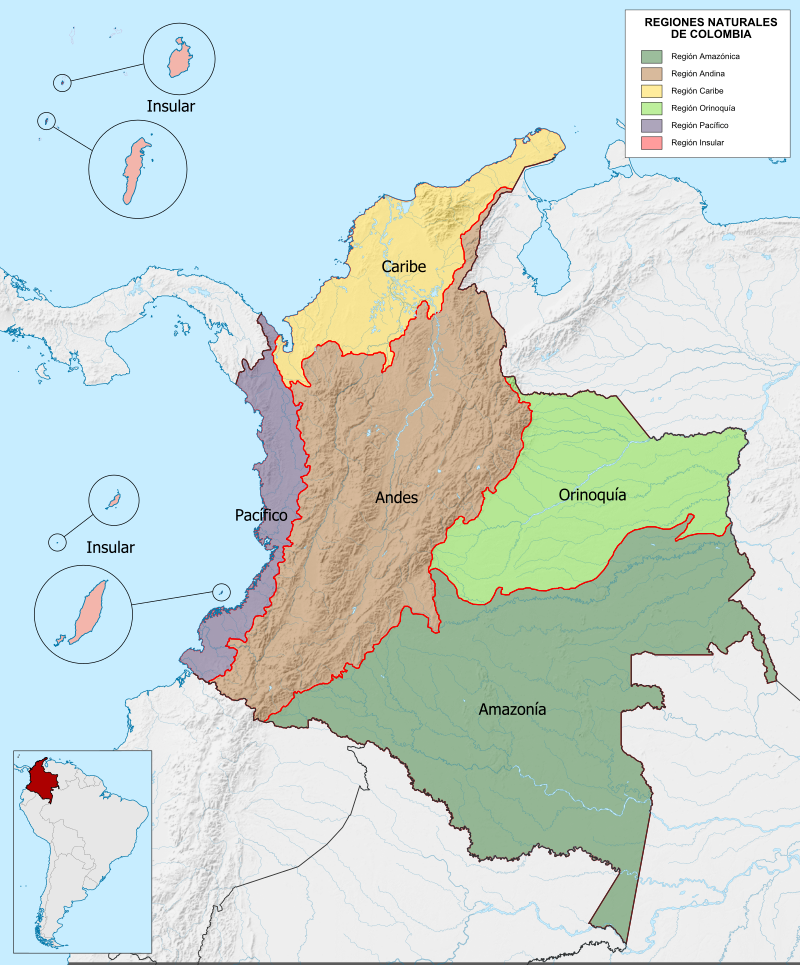

In [ ]:
#Primero: cargar el Drive:
from google.colab import drive
drive.mount('/content/Mdrive')
%cd /content/Mdrive/MyDrive/mgual/Geoinfo/Tesis/Analisis_Anual/Entrega_2/
! pwd

Drive already mounted at /content/Mdrive; to attempt to forcibly remount, call drive.mount("/content/Mdrive", force_remount=True).
/content/Mdrive/MyDrive/mgual/Geoinfo/Tesis/Analisis_Anual/Entrega_2
/content/Mdrive/MyDrive/mgual/Geoinfo/Tesis/Analisis_Anual/Entrega_2


Necesitaría que se hiciera una tabla única con los valores de cada estación con lat, lon y nombre para que fuera más útil de visualizar

In [ ]:
df = pd.read_excel('Libro_estaciones.xlsx')

In [ ]:
df

,Codigo,Estacion,lat,lon,Municipio,Identificador
0,23215030,AGUAS CLARAS [23215030],8.228889,-73.602778,Aguachica,0
1,23155040,CENTRO EL [23155040],6.859556,-73.765083,Barrancabermeja,0
2,21205710,JARDIN BOTANICO - AUT [21205710],4.669333,-74.102667,Bogota,0
3,23195040,UNIVERSIDAD INDUSTRIAL SANTANDER [23195040],7.144722,-73.122222,Bucaramanga,0
4,27045020,CASERI [27045020],7.811722,-74.935972,Cucasia,0
5,16015040,SANTA ISABEL [16015040],8.233333,-72.433333,Cucuta,0
6,21205420,TIBAITATA [21205420],4.691417,-74.209000,Mosquera,0
7,21135050,JULIA LA [21135050],3.098778,-75.530028,Neiva,0
8,52055210,BOTANA - AUT [52055210],1.160000,-77.278806,Pasto,0
9,26035030,AEROPUERTO G L VALENCIA [26035030],2.452889,-76.608750,Popayan,0


In [ ]:
#Definición del DF para cada Región Natural:
#Región Andina
andina = df.loc[df['Identificador']==0]
lat_andina,lon_andina = andina['lat'],andina['lon']
#Región Amazonía
amazonia = df.loc[df['Identificador']==1]
lat_amazonia,lon_amazonia = amazonia['lat'],amazonia['lon']
#Región Pacífica
pacifica = df.loc[df['Identificador']==2]
lat_pacifica,lon_pacifica = pacifica['lat'],pacifica['lon']
#Región Caribe
caribe = df.loc[df['Identificador']==3]
lat_caribe,lon_caribe = caribe['lat'],caribe['lon']
#Región Orinoquía
orinoquia = df.loc[df['Identificador']==4]
lat_orinoquia,lon_orinoquia = orinoquia['lat'],orinoquia['lon']
#Región Insular
insular = df.loc[df['Identificador']==5]
lat_insular,lon_insular = insular['lat'],insular['lon']

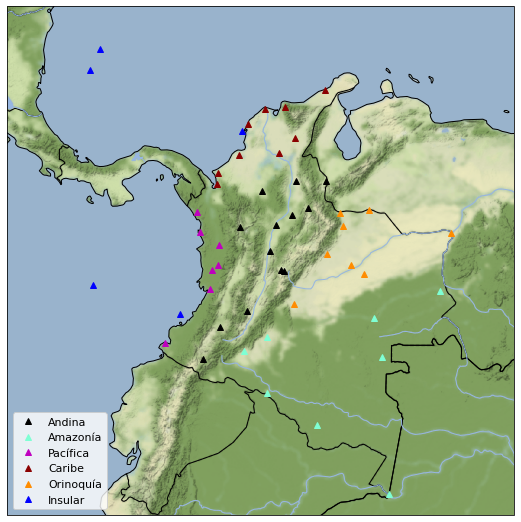

In [ ]:
# descargar topografía y fronteras
tiler = cio.Stamen('terrain-background')

proj = ccrs.Mercator()
fig = plt.figure(figsize=(20,20))
ax  = fig.add_subplot(121,projection=proj)
ax.set_extent([-85, -65, -5, 15])

# Adicionar topografía
ax.add_image(tiler,6)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAKES)

#Andina
ax.plot(lon_andina,lat_andina,'^',color='k',label='Andina',transform=ccrs.Geodetic())
#Amazonía
ax.plot(lon_amazonia,lat_amazonia,'^',color='aquamarine',label='Amazonía',transform=ccrs.Geodetic())
#Pacífica
ax.plot(lon_pacifica,lat_pacifica,'^',color='m',label='Pacífica',transform=ccrs.Geodetic())
#Caribe
ax.plot(lon_caribe,lat_caribe,'^',color='darkred',label='Caribe',transform=ccrs.Geodetic())
#Orinoquía
ax.plot(lon_orinoquia,lat_orinoquia,'^',color='darkorange',label='Orinoquía',transform=ccrs.Geodetic())
#Insular
ax.plot(lon_insular,lat_insular,'^',color='blue',label='Insular',transform=ccrs.Geodetic())
plt.legend(loc=3, prop={'size': 11})
plt.show()

##DF con el Data de cada estación

In [ ]:
#Primero: cargar el Drive:
from google.colab import drive
drive.mount('/content/Mdrive')
%cd /content/Mdrive/MyDrive/mgual/Geoinfo/Tesis/Analisis_Anual/Entrega_2/Andina/
! pwd

Drive already mounted at /content/Mdrive; to attempt to forcibly remount, call drive.mount("/content/Mdrive", force_remount=True).
/content/Mdrive/MyDrive/mgual/Geoinfo/Tesis/Analisis_Anual/Entrega_2/Andina
/content/Mdrive/MyDrive/mgual/Geoinfo/Tesis/Analisis_Anual/Entrega_2/Andina


In [ ]:
df = pd.read_excel('Tibaitata_1990-2019.xlsx')

In [ ]:
df

,CodigoEstacion,NombreEstacion,Latitud,Longitud,Altitud,Departamento,Municipio,IdParametro,Frecuencia,Fecha,IDEAM,ERA5
0,21205420,TIBAITATA [21205420],4.691417,-74.209,2543,Cundinamarca,Mosquera,Precipitacion total mensual,Mensual,1990-01-01,34.8,202.611711
1,21205420,TIBAITATA [21205420],4.691417,-74.209,2543,Cundinamarca,Mosquera,Precipitacion total mensual,Mensual,1990-02-01,47.9,306.567257
2,21205420,TIBAITATA [21205420],4.691417,-74.209,2543,Cundinamarca,Mosquera,Precipitacion total mensual,Mensual,1990-03-01,50.6,385.848363
3,21205420,TIBAITATA [21205420],4.691417,-74.209,2543,Cundinamarca,Mosquera,Precipitacion total mensual,Mensual,1990-04-01,107.8,454.317091
4,21205420,TIBAITATA [21205420],4.691417,-74.209,2543,Cundinamarca,Mosquera,Precipitacion total mensual,Mensual,1990-05-01,67.2,359.108796
...,...,...,...,...,...,...,...,...,...,...,...,...
355,21205420,TIBAITATA [21205420],4.691417,-74.209,2543,Cundinamarca,Mosquera,Precipitacion total mensual,Mensual,2019-08-01,26.5,122.938407
356,21205420,TIBAITATA [21205420],4.691417,-74.209,2543,Cundinamarca,Mosquera,Precipitacion total mensual,Mensual,2019-09-01,24.2,233.895299
357,21205420,TIBAITATA [21205420],4.691417,-74.209,2543,Cundinamarca,Mosquera,Precipitacion total mensual,Mensual,2019-10-01,60.3,243.405587
358,21205420,TIBAITATA [21205420],4.691417,-74.209,2543,Cundinamarca,Mosquera,Precipitacion total mensual,Mensual,2019-11-01,61.5,164.198162


###Gráfica de años vs medición, IDEAM y ERA5

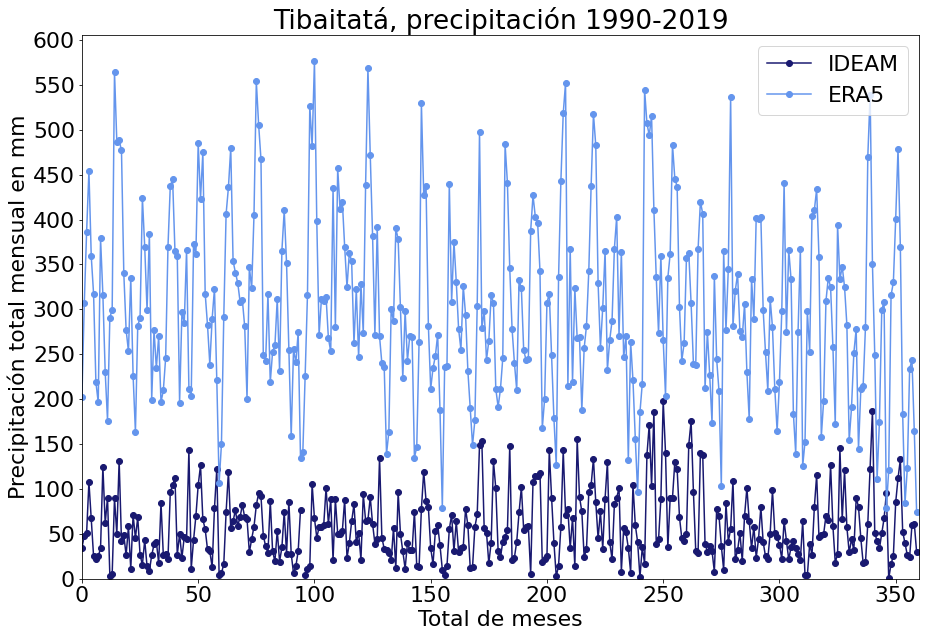

In [ ]:
font = {'family':'normal','weight':'normal','size':22}
matplotlib.rc('font',**font)
fig,ax = plt.subplots(figsize=(15,10))
ideam = df.iloc[:,10]
era5 = df.iloc[:,11]
ejex = np.arange(len(ideam))
ax.plot(ejex,ideam,'o',color='midnightblue',linestyle='-',label='IDEAM')
ax.plot(ejex,era5,'o',color='cornflowerblue',linestyle='-',label='ERA5')
ax.legend()
ax.set_xlabel('Total de meses')
ax.set_xlim(0,360)
ax.set_ylim(0,top=None)
ax.set_yticks([0,50,100,150,200,250,300,350,400,450,500,550,600])
ax.set_ylabel('Precipitación total mensual en mm')
ax.set_title('Tibaitatá, precipitación 1990-2019')
#plt.savefig('fig1_lab.pdf') hay '.png' '.jpg' #Todas formas de guardar la figura, con resolución y demás. Queda en el drive.
plt.show()

In [ ]:
newDf = df.astype({'IDEAM':'float','ERA5':'float'})

In [ ]:
newDf[['IDEAM','ERA5']].dropna()
newDf[['IDEAM','ERA5']].corr()
#Ganancia:
#No tiene en cuenta la dependencia temporal
#Literatura acerca de la correlación climática sobre las variables 
#Mayor a 0.7 es buenísima
#Entre 0.4 y 0.6 es aceptables 
#interpolación spline función matemática que se usan para teer curvas u ondas, suaviza la curva para obtener los puntos 

,IDEAM,ERA5
IDEAM,1.000000,0.340397
ERA5,0.340397,1.000000


#TEMPERATURAS

In [ ]:
dfTmin = pd.read_excel('Tibaitata_1990-2019.xlsx',sheet_name=2)

In [ ]:
dfTmin

,CodigoEstacion,NombreEstacion,Latitud,Longitud,Altitud,Departamento,Municipio,IdParametro,Frecuencia,Fecha,IDEAM_K,IDEAM_C,ERA5_C,ERA5_K
0,21205420,TIBAITATA [21205420],4.691417,-74.209,2543,Cundinamarca,Mosquera,Temperatura mínima mensual 2m,Mensual,1990-01-01,273.95,0.8,9.688867,282.838867
1,21205420,TIBAITATA [21205420],4.691417,-74.209,2543,Cundinamarca,Mosquera,Temperatura mínima mensual 2m,Mensual,1990-02-01,274.75,1.6,10.296167,283.446167
2,21205420,TIBAITATA [21205420],4.691417,-74.209,2543,Cundinamarca,Mosquera,Temperatura mínima mensual 2m,Mensual,1990-03-01,276.95,3.8,10.489526,283.639526
3,21205420,TIBAITATA [21205420],4.691417,-74.209,2543,Cundinamarca,Mosquera,Temperatura mínima mensual 2m,Mensual,1990-04-01,276.95,3.8,10.203516,283.353516
4,21205420,TIBAITATA [21205420],4.691417,-74.209,2543,Cundinamarca,Mosquera,Temperatura mínima mensual 2m,Mensual,1990-05-01,275.95,2.8,9.972070,283.122070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,21205420,TIBAITATA [21205420],4.691417,-74.209,2543,Cundinamarca,Mosquera,Temperatura mínima mensual 2m,Mensual,2019-08-01,277.15,4.0,9.201074,282.351074
356,21205420,TIBAITATA [21205420],4.691417,-74.209,2543,Cundinamarca,Mosquera,Temperatura mínima mensual 2m,Mensual,2019-09-01,275.15,2.0,9.214990,282.364990
357,21205420,TIBAITATA [21205420],4.691417,-74.209,2543,Cundinamarca,Mosquera,Temperatura mínima mensual 2m,Mensual,2019-10-01,275.15,2.0,9.792627,282.942627
358,21205420,TIBAITATA [21205420],4.691417,-74.209,2543,Cundinamarca,Mosquera,Temperatura mínima mensual 2m,Mensual,2019-11-01,276.15,3.0,9.822656,282.972656


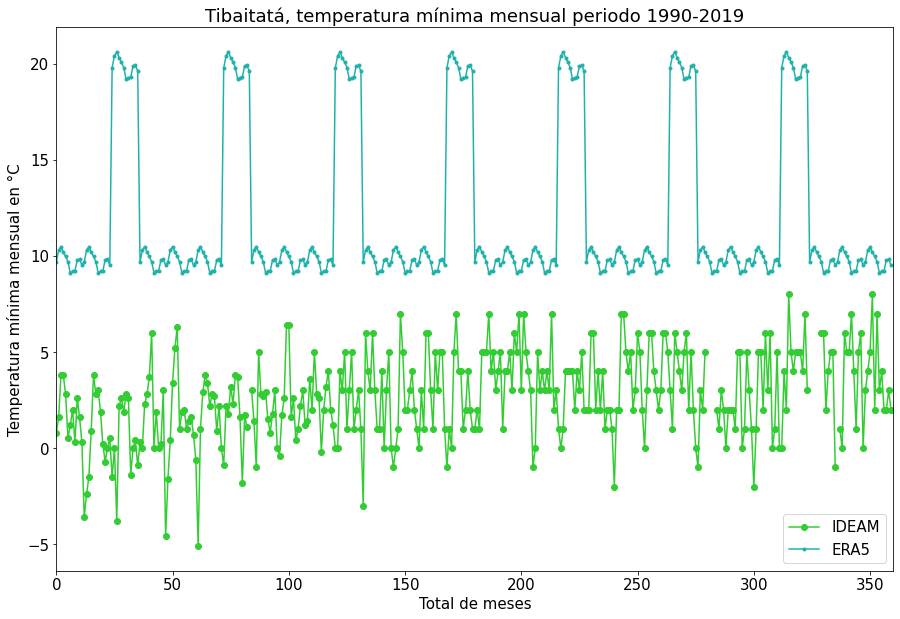

In [ ]:
font = {'family':'normal','weight':'normal','size':15}
matplotlib.rc('font',**font)
fig,ax = plt.subplots(figsize=(15,10))
ideam = dfTmin.iloc[:,11]
era5 = dfTmin.iloc[:,12]
ejex = np.arange(len(ideam))
ax.plot(ejex,ideam,'o',color='limegreen',linestyle='-',label='IDEAM')
ax.plot(ejex,era5,'.',color='lightseagreen',linestyle='-',label='ERA5')
ax.legend()
ax.set_xlabel('Total de meses')
ax.set_xlim(0,360)
# ax.set_ylim(0,top=None)
# ax.set_yticks([0,10,15,20,25,30,35,40])
ax.set_ylabel('Temperatura mínima mensual en °C')
ax.set_title('Tibaitatá, temperatura mínima mensual periodo 1990-2019')
#plt.savefig('fig1_lab.pdf') hay '.png' '.jpg' #Todas formas de guardar la figura, con resolución y demás. Queda en el drive.
plt.show()

In [ ]:
newDf = dfTmin.astype({'IDEAM_C':'float','ERA5_C':'float'})

In [ ]:
newDf[['IDEAM_C','ERA5_C']].dropna()
newDf[['IDEAM_C','ERA5_C']].corr()

,IDEAM_C,ERA5_C
IDEAM_C,1.000000,-0.026295
ERA5_C,-0.026295,1.000000


In [ ]:
dfTmax = pd.read_excel('Tibaitata_1990-2019.xlsx',sheet_name=1)

In [ ]:
dfTmax

,CodigoEstacion,NombreEstacion,Latitud,Longitud,Altitud,Departamento,Municipio,IdParametro,Frecuencia,Fecha,IDEAM_K,IDEAM_C,ERA5_C,ERA5_K
0,21205420,TIBAITATA [21205420],4.691417,-74.209,2543,Cundinamarca,Mosquera,Temperatura máxima mensual 2m,Mensual,1990-01-01,294.35,21.2,23.531763,296.681763
1,21205420,TIBAITATA [21205420],4.691417,-74.209,2543,Cundinamarca,Mosquera,Temperatura máxima mensual 2m,Mensual,1990-02-01,295.75,22.6,24.110986,297.260986
2,21205420,TIBAITATA [21205420],4.691417,-74.209,2543,Cundinamarca,Mosquera,Temperatura máxima mensual 2m,Mensual,1990-03-01,295.25,22.1,24.127100,297.277100
3,21205420,TIBAITATA [21205420],4.691417,-74.209,2543,Cundinamarca,Mosquera,Temperatura máxima mensual 2m,Mensual,1990-04-01,294.15,21.0,23.982446,297.132446
4,21205420,TIBAITATA [21205420],4.691417,-74.209,2543,Cundinamarca,Mosquera,Temperatura máxima mensual 2m,Mensual,1990-05-01,294.45,21.3,23.194971,296.344971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,21205420,TIBAITATA [21205420],4.691417,-74.209,2543,Cundinamarca,Mosquera,Temperatura máxima mensual 2m,Mensual,2019-08-01,294.55,21.4,23.566309,296.716309
356,21205420,TIBAITATA [21205420],4.691417,-74.209,2543,Cundinamarca,Mosquera,Temperatura máxima mensual 2m,Mensual,2019-09-01,295.55,22.4,24.322778,297.472778
357,21205420,TIBAITATA [21205420],4.691417,-74.209,2543,Cundinamarca,Mosquera,Temperatura máxima mensual 2m,Mensual,2019-10-01,294.75,21.6,23.429712,296.579712
358,21205420,TIBAITATA [21205420],4.691417,-74.209,2543,Cundinamarca,Mosquera,Temperatura máxima mensual 2m,Mensual,2019-11-01,295.75,22.6,23.545190,296.695190


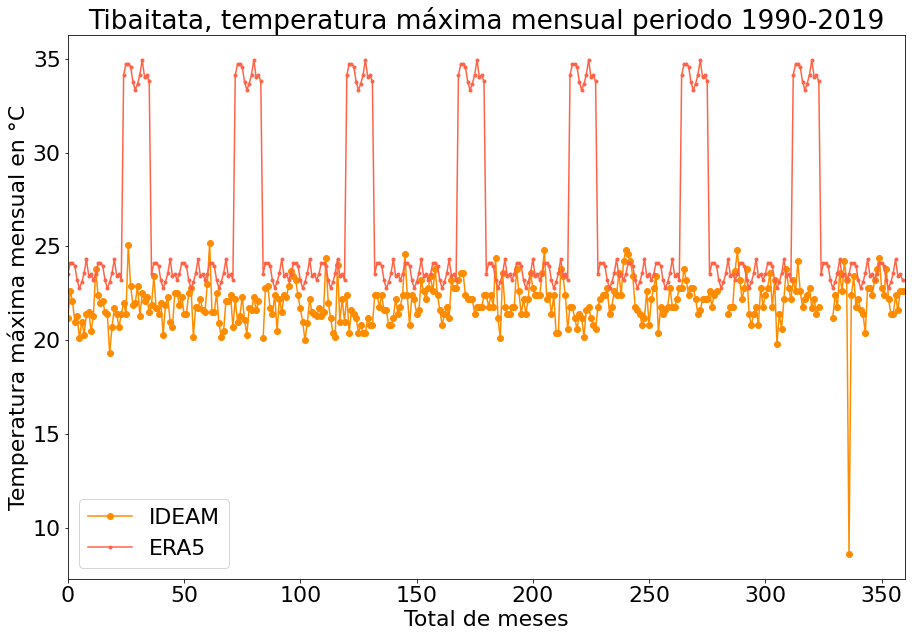

In [ ]:
font = {'family':'normal','weight':'normal','size':22}
matplotlib.rc('font',**font)
fig,ax = plt.subplots(figsize=(15,10))
ideam = dfTmax.iloc[:,11]
era5 = dfTmax.iloc[:,12]
ejex = np.arange(len(ideam))
ax.plot(ejex,ideam,'o',color='darkorange',linestyle='-',label='IDEAM')
ax.plot(ejex,era5,'.',color='tomato',linestyle='-',label='ERA5')
ax.legend()
ax.set_xlabel('Total de meses')
ax.set_xlim(0,360)
# ax.set_ylim(0,top=None)
# ax.set_yticks([0,10,15,20,25,30,35,40])
ax.set_ylabel('Temperatura máxima mensual en °C')
ax.set_title('Tibaitata, temperatura máxima mensual periodo 1990-2019')
#plt.savefig('fig1_lab.pdf') hay '.png' '.jpg' #Todas formas de guardar la figura, con resolución y demás. Queda en el drive.
plt.show()

In [ ]:
newDf = dfTmax.astype({'IDEAM_C':'float','ERA5_C':'float'})

In [ ]:
newDf[['IDEAM_C','ERA5_C']].dropna()
newDf[['IDEAM_C','ERA5_C']].corr()

,IDEAM_C,ERA5_C
IDEAM_C,1.000000,-0.018157
ERA5_C,-0.018157,1.000000


#ESTACIÓN AGUASCLARAS, AGUACHICA, CESAR

In [ ]:
from google.colab import drive
drive.mount('/content/Mdrive')
%cd /content/Mdrive/MyDrive/mgual/Geoinfo/Tesis/Analisis_Anual/Entrega_2/Andina/
! pwd

Drive already mounted at /content/Mdrive; to attempt to forcibly remount, call drive.mount("/content/Mdrive", force_remount=True).
/content/Mdrive/MyDrive/mgual/Geoinfo/Tesis/Analisis_Anual/Entrega_2/Andina
/content/Mdrive/MyDrive/mgual/Geoinfo/Tesis/Analisis_Anual/Entrega_2/Andina


In [ ]:
df = pd.read_excel('AguasClaras_1990-2019.xlsx')

In [ ]:
df

,CodigoEstacion,NombreEstacion,Latitud,Longitud,Altitud,Departamento,Municipio,DescripcionSerie,Frecuencia,Fecha,IDEAM,ERA5
0,23215030,AGUAS CLARAS [23215030],8.228889,-73.602778,208,Cesar,Aguachica,PTotal,Mensual,1990-01-01,3.9,44.420769
1,23215030,AGUAS CLARAS [23215030],8.228889,-73.602778,208,Cesar,Aguachica,PTotal,Mensual,1990-02-01,84.6,38.634465
2,23215030,AGUAS CLARAS [23215030],8.228889,-73.602778,208,Cesar,Aguachica,PTotal,Mensual,1990-03-01,15.7,66.042594
3,23215030,AGUAS CLARAS [23215030],8.228889,-73.602778,208,Cesar,Aguachica,PTotal,Mensual,1990-04-01,196.0,378.105585
4,23215030,AGUAS CLARAS [23215030],8.228889,-73.602778,208,Cesar,Aguachica,PTotal,Mensual,1990-05-01,125.8,353.184007
...,...,...,...,...,...,...,...,...,...,...,...,...
355,23215030,AGUAS CLARAS [23215030],8.228889,-73.602778,208,Cesar,Aguachica,PTotal,Mensual,2019-08-01,117.3,149.269652
356,23215030,AGUAS CLARAS [23215030],8.228889,-73.602778,208,Cesar,Aguachica,PTotal,Mensual,2019-09-01,167.4,334.257349
357,23215030,AGUAS CLARAS [23215030],8.228889,-73.602778,208,Cesar,Aguachica,PTotal,Mensual,2019-10-01,201.8,243.333243
358,23215030,AGUAS CLARAS [23215030],8.228889,-73.602778,208,Cesar,Aguachica,PTotal,Mensual,2019-11-01,29.0,151.908346


####Gráfica medición de precipitación AguasClaras 1990-2019

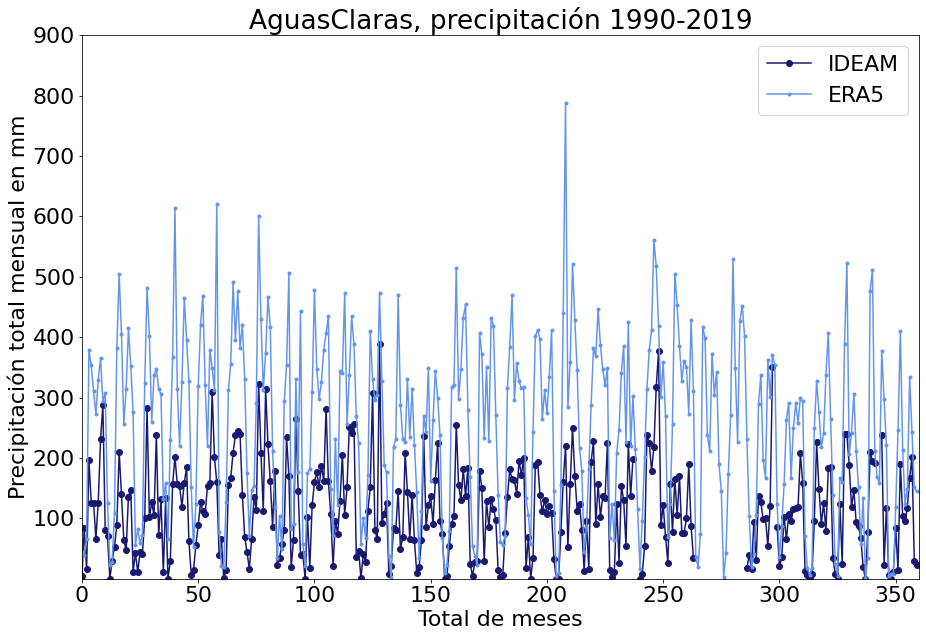

In [ ]:
font = {'family':'normal','weight':'normal','size':22}
matplotlib.rc('font',**font)
fig,ax = plt.subplots(figsize=(15,10))
ideam = df.iloc[:,10]
era5 = df.iloc[:,11]
ejex = np.arange(len(ideam))
ax.plot(ejex,ideam,'o',color='midnightblue',linestyle='-',label='IDEAM')
ax.plot(ejex,era5,'.',color='cornflowerblue',linestyle='-',label='ERA5')
ax.legend()
ax.set_xlabel('Total de meses')
ax.set_xlim(0,360)
ax.set_ylim(0,top=None)
ax.set_yticks([100,200,300,400,500,600,700,800,900])
ax.set_ylabel('Precipitación total mensual en mm')
ax.set_title('AguasClaras, precipitación 1990-2019')
#plt.savefig('fig1_lab.pdf') hay '.png' '.jpg' #Todas formas de guardar la figura, con resolución y demás. Queda en el drive.
plt.show()

In [ ]:
newDf = df.astype({'IDEAM':'float','ERA5':'float'})

In [ ]:
newDf[['IDEAM','ERA5']].dropna()
newDf[['IDEAM','ERA5']].corr()

,IDEAM,ERA5
IDEAM,1.000000,0.732038
ERA5,0.732038,1.000000


In [ ]:
dfTmin = pd.read_excel('AguasClaras_1990-2019.xlsx',sheet_name=2)

In [ ]:
dfTmin

,CodigoEstacion,NombreEstacion,Latitud,Longitud,Altitud,Departamento,Municipio,DescripcionSerie,Frecuencia,Fecha,IDEAM_K,IDEAM_C,ERA5_C,ERA5_K
0,23215030,AGUAS CLARAS [23215030],8.228889,-73.602778,208,Cesar,Aguachica,TMinima,Diaria,1990-01-01,293.55,20.4,21.776758,294.926758
1,23215030,AGUAS CLARAS [23215030],8.228889,-73.602778,208,Cesar,Aguachica,TMinima,Diaria,1990-02-01,293.15,20.0,21.864160,295.014160
2,23215030,AGUAS CLARAS [23215030],8.228889,-73.602778,208,Cesar,Aguachica,TMinima,Diaria,1990-03-01,294.55,21.4,23.034326,296.184326
3,23215030,AGUAS CLARAS [23215030],8.228889,-73.602778,208,Cesar,Aguachica,TMinima,Diaria,1990-04-01,295.75,22.6,22.474268,295.624268
4,23215030,AGUAS CLARAS [23215030],8.228889,-73.602778,208,Cesar,Aguachica,TMinima,Diaria,1990-05-01,295.75,22.6,22.698877,295.848877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,23215121,AGUAS CLARAS [23215030],8.228889,-73.602778,208,Cesar,Aguachica,TMinima,Diaria,2019-08-01,NaN,NaN,22.300684,295.450684
356,23215122,AGUAS CLARAS [23215030],8.228889,-73.602778,208,Cesar,Aguachica,TMinima,Diaria,2019-09-01,NaN,NaN,21.953271,295.103271
357,23215123,AGUAS CLARAS [23215030],8.228889,-73.602778,208,Cesar,Aguachica,TMinima,Diaria,2019-10-01,NaN,NaN,21.745996,294.895996
358,23215124,AGUAS CLARAS [23215030],8.228889,-73.602778,208,Cesar,Aguachica,TMinima,Diaria,2019-11-01,NaN,NaN,21.979150,295.129150


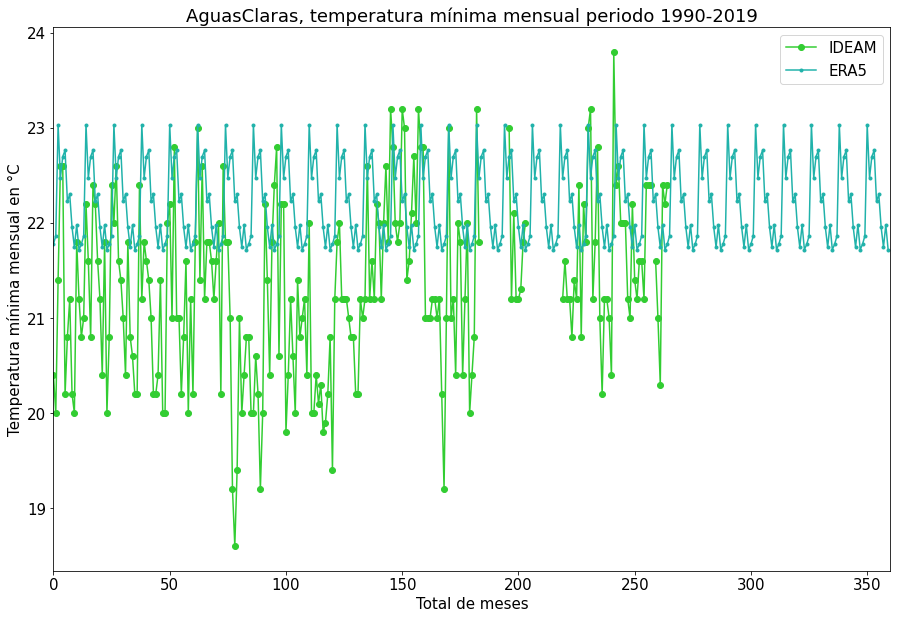

In [ ]:
font = {'family':'normal','weight':'normal','size':15}
matplotlib.rc('font',**font)
fig,ax = plt.subplots(figsize=(15,10))
ideam = dfTmin.iloc[:,11]
era5 = dfTmin.iloc[:,12]
ejex = np.arange(len(ideam))
ax.plot(ejex,ideam,'o',color='limegreen',linestyle='-',label='IDEAM')
ax.plot(ejex,era5,'.',color='lightseagreen',linestyle='-',label='ERA5')
ax.legend()
ax.set_xlabel('Total de meses')
ax.set_xlim(0,360)
# ax.set_ylim(0,top=None)
# ax.set_yticks([0,10,15,20,25,30,35,40])
ax.set_ylabel('Temperatura mínima mensual en °C')
ax.set_title('AguasClaras, temperatura mínima mensual periodo 1990-2019')
#plt.savefig('fig1_lab.pdf') hay '.png' '.jpg' #Todas formas de guardar la figura, con resolución y demás. Queda en el drive.
plt.show()

In [ ]:
newDf = dfTmin.astype({'IDEAM_C':'float','ERA5_C':'float'})

In [ ]:
newDf[['IDEAM_C','ERA5_C']].dropna()
newDf[['IDEAM_C','ERA5_C']].corr()

,IDEAM_C,ERA5_C
IDEAM_C,1.000000,0.241643
ERA5_C,0.241643,1.000000


In [ ]:
dfTmax = pd.read_excel('AguasClaras_1990-2019.xlsx',sheet_name=1)

In [ ]:
dfTmax

,CodigoEstacion,NombreEstacion,Latitud,Longitud,Altitud,Departamento,Municipio,DescripcionSerie,Frecuencia,Fecha,IDEAM_K,IDEAM_C,ERA5_C,ERA5_K
0,23215030,AGUAS CLARAS [23215030],8.228889,-73.602778,208,Cesar,Aguachica,TMaxima,Diaria,1990-01-31,310.75,37.6,28.331689,301.481689
1,23215030,AGUAS CLARAS [23215030],8.228889,-73.602778,208,Cesar,Aguachica,TMaxima,Diaria,1990-02-28,309.75,36.6,29.627588,302.777588
2,23215030,AGUAS CLARAS [23215030],8.228889,-73.602778,208,Cesar,Aguachica,TMaxima,Diaria,1990-03-31,310.95,37.8,29.580957,302.730957
3,23215030,AGUAS CLARAS [23215030],8.228889,-73.602778,208,Cesar,Aguachica,TMaxima,Diaria,1990-04-30,310.75,37.6,27.907617,301.057617
4,23215030,AGUAS CLARAS [23215030],8.228889,-73.602778,208,Cesar,Aguachica,TMaxima,Diaria,1990-05-31,307.75,34.6,28.067041,301.217041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,23215128,AGUAS CLARAS [23215030],8.228889,-73.602778,208,Cesar,Aguachica,TMaxima,Diaria,2019-08-01,NaN,NaN,27.768213,300.918213
356,23215129,AGUAS CLARAS [23215030],8.228889,-73.602778,208,Cesar,Aguachica,TMaxima,Diaria,2019-09-01,NaN,NaN,27.800439,300.950439
357,23215130,AGUAS CLARAS [23215030],8.228889,-73.602778,208,Cesar,Aguachica,TMaxima,Diaria,2019-10-01,NaN,NaN,26.853906,300.003906
358,23215131,AGUAS CLARAS [23215030],8.228889,-73.602778,208,Cesar,Aguachica,TMaxima,Diaria,2019-11-01,NaN,NaN,27.043848,300.193848


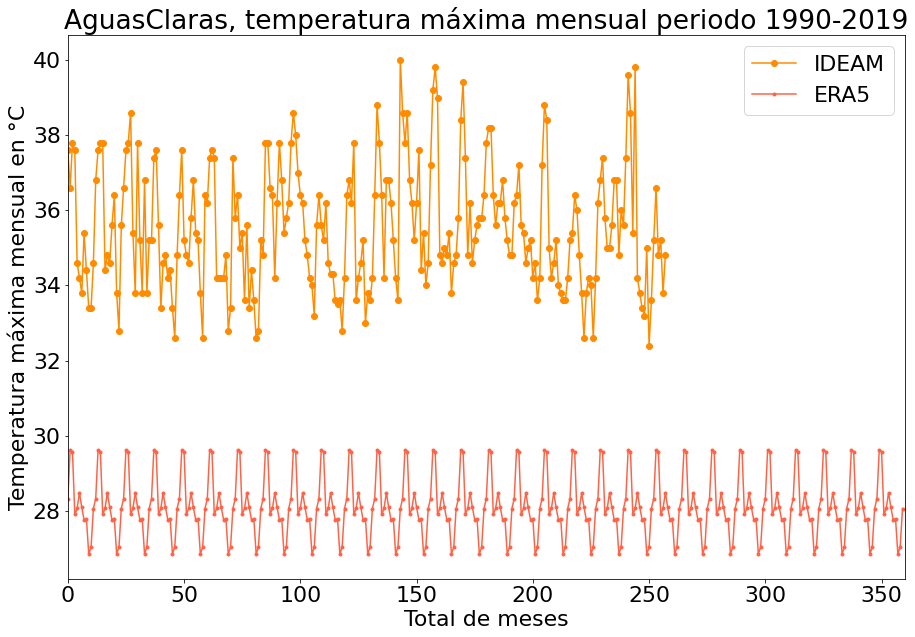

In [ ]:
font = {'family':'normal','weight':'normal','size':22}
matplotlib.rc('font',**font)
fig,ax = plt.subplots(figsize=(15,10))
ideam = dfTmax.iloc[:,11]
era5 = dfTmax.iloc[:,12]
ejex = np.arange(len(ideam))
ax.plot(ejex,ideam,'o',color='darkorange',linestyle='-',label='IDEAM')
ax.plot(ejex,era5,'.',color='tomato',linestyle='-',label='ERA5')
ax.legend()
ax.set_xlabel('Total de meses')
ax.set_xlim(0,360)
# ax.set_ylim(0,top=None)
# ax.set_yticks([0,10,15,20,25,30,35,40])
ax.set_ylabel('Temperatura máxima mensual en °C')
ax.set_title('AguasClaras, temperatura máxima mensual periodo 1990-2019')
#plt.savefig('fig1_lab.pdf') hay '.png' '.jpg' #Todas formas de guardar la figura, con resolución y demás. Queda en el drive.
plt.show()

In [ ]:
newDf = dfTmax.astype({'IDEAM_C':'float','ERA5_C':'float'})

In [ ]:
newDf[['IDEAM_C','ERA5_C']].dropna()
newDf[['IDEAM_C','ERA5_C']].corr()

,IDEAM_C,ERA5_C
IDEAM_C,1.000000,0.604702
ERA5_C,0.604702,1.000000


#ESTACIÓN EL CENTRO, BARRANCABERMEJA, SANTANDER

In [ ]:
from google.colab import drive
drive.mount('/content/Mdrive')
%cd /content/Mdrive/MyDrive/mgual/Geoinfo/Tesis/Analisis_Anual/Entrega_2/Andina/
! pwd

Drive already mounted at /content/Mdrive; to attempt to forcibly remount, call drive.mount("/content/Mdrive", force_remount=True).
/content/Mdrive/MyDrive/mgual/Geoinfo/Tesis/Analisis_Anual/Entrega_2/Andina
/content/Mdrive/MyDrive/mgual/Geoinfo/Tesis/Analisis_Anual/Entrega_2/Andina


In [ ]:
df = pd.read_excel('ElCentro_1990-2019.xlsx')

In [ ]:
df

,CodigoEstacion,NombreEstacion,Latitud,Longitud,Altitud,Departamento,Municipio,IdParametro,Etiqueta,Frecuencia,Fecha,IDEAM,ERA5
0,23155040,CENTRO EL [23155040],6.859556,-73.765083,114,Santander,Barrancabermeja,PRECIPITACION,PTPM_TT_M,Mensual,1990-01-01,104.4,106.962947
1,23155040,CENTRO EL [23155040],6.859556,-73.765083,114,Santander,Barrancabermeja,PRECIPITACION,PTPM_TT_M,Mensual,1990-02-01,123.0,142.794073
2,23155040,CENTRO EL [23155040],6.859556,-73.765083,114,Santander,Barrancabermeja,PRECIPITACION,PTPM_TT_M,Mensual,1990-03-01,180.8,374.647416
3,23155040,CENTRO EL [23155040],6.859556,-73.765083,114,Santander,Barrancabermeja,PRECIPITACION,PTPM_TT_M,Mensual,1990-04-01,260.4,354.157984
4,23155040,CENTRO EL [23155040],6.859556,-73.765083,114,Santander,Barrancabermeja,PRECIPITACION,PTPM_TT_M,Mensual,1990-05-01,288.8,210.064817
...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,23155040,CENTRO EL [23155040],6.859556,-73.765083,114,Santander,Barrancabermeja,PRECIPITACION,PTPM_TT_M,Mensual,2019-08-01,59.5,156.935479
356,23155040,CENTRO EL [23155040],6.859556,-73.765083,114,Santander,Barrancabermeja,PRECIPITACION,PTPM_TT_M,Mensual,2019-09-01,187.4,250.058658
357,23155040,CENTRO EL [23155040],6.859556,-73.765083,114,Santander,Barrancabermeja,PRECIPITACION,PTPM_TT_M,Mensual,2019-10-01,445.1,206.709083
358,23155040,CENTRO EL [23155040],6.859556,-73.765083,114,Santander,Barrancabermeja,PRECIPITACION,PTPM_TT_M,Mensual,2019-11-01,NaN,160.446424


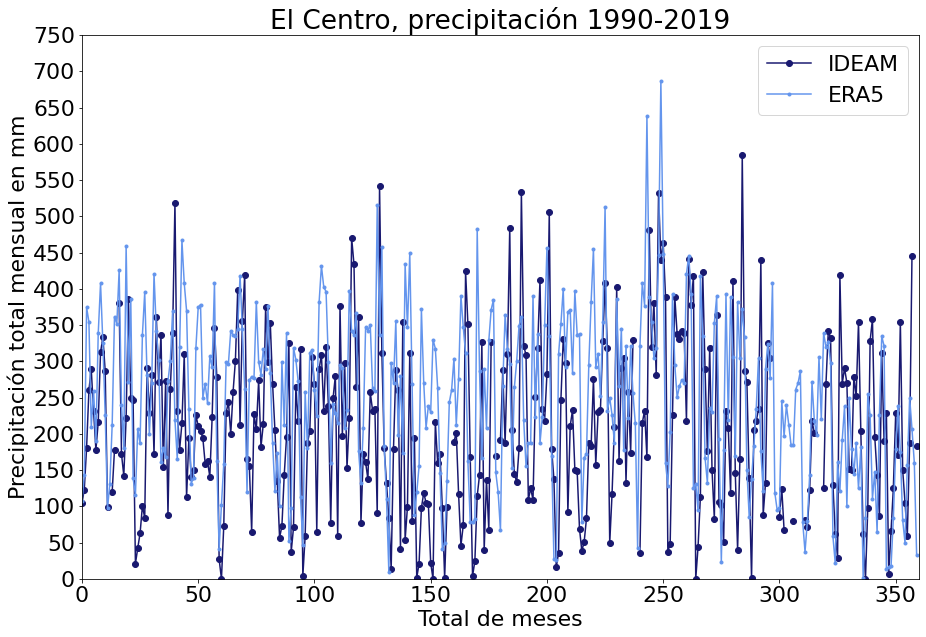

In [ ]:
font = {'family':'normal','weight':'normal','size':22}
matplotlib.rc('font',**font)
fig,ax = plt.subplots(figsize=(15,10))
ideam = df.iloc[:,11]
era5 = df.iloc[:,12]
ejex = np.arange(len(ideam))
ax.plot(ejex,ideam,'o',color='midnightblue',linestyle='-',label='IDEAM')
ax.plot(ejex,era5,'.',color='cornflowerblue',linestyle='-',label='ERA5')
ax.legend()
ax.set_xlabel('Total de meses')
ax.set_xlim(0,360)
ax.set_ylim(0,top=None)
ax.set_yticks([0,50,100,150,200,250,300,350,400,450,500,550,600,650,700,750])
ax.set_ylabel('Precipitación total mensual en mm')
ax.set_title('El Centro, precipitación 1990-2019')
#plt.savefig('fig1_lab.pdf') hay '.png' '.jpg' #Todas formas de guardar la figura, con resolución y demás. Queda en el drive.
plt.show()

In [ ]:
newDf = df.astype({'IDEAM':'float','ERA5':'float'})

In [ ]:
newDf[['IDEAM','ERA5']].corr()

,IDEAM,ERA5
IDEAM,1.000000,0.357033
ERA5,0.357033,1.000000


In [ ]:
dfTmin = pd.read_excel('ElCentro_1990-2019.xlsx',sheet_name=2)

In [ ]:
dfTmin

,CodigoEstacion,NombreEstacion,Latitud,Longitud,Altitud,Departamento,Municipio,IdParametro,Etiqueta,Frecuencia,Fecha,IDEAM_K,IDEAM_C,ERA5_C,ERA5_K
0,23155040.0,CENTRO EL [23155040],6.859556,-73.765083,114.0,Santander,Barrancabermeja,TEMPERATURA,TMX_CON,Mensual,1990-01-30,307.35,34.2,28.948633,302.098633
1,23155040.0,CENTRO EL [23155040],6.859556,-73.765083,114.0,Santander,Barrancabermeja,TEMPERATURA,TMX_CON,Mensual,1990-02-01,NaN,NaN,29.750879,302.900879
2,23155040.0,CENTRO EL [23155040],6.859556,-73.765083,114.0,Santander,Barrancabermeja,TEMPERATURA,TMX_CON,Mensual,1990-03-01,NaN,NaN,30.359521,303.509521
3,23155040.0,CENTRO EL [23155040],6.859556,-73.765083,114.0,Santander,Barrancabermeja,TEMPERATURA,TMX_CON,Mensual,1990-04-01,NaN,NaN,29.491846,302.641846
4,23155040.0,CENTRO EL [23155040],6.859556,-73.765083,114.0,Santander,Barrancabermeja,TEMPERATURA,TMX_CON,Mensual,1990-05-01,NaN,NaN,29.599023,302.749023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-01,NaN,NaN,29.927637,303.077637
356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-09-01,NaN,NaN,29.698877,302.848877
357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-10-01,NaN,NaN,28.593164,301.743164
358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-11-01,NaN,NaN,28.641260,301.791260


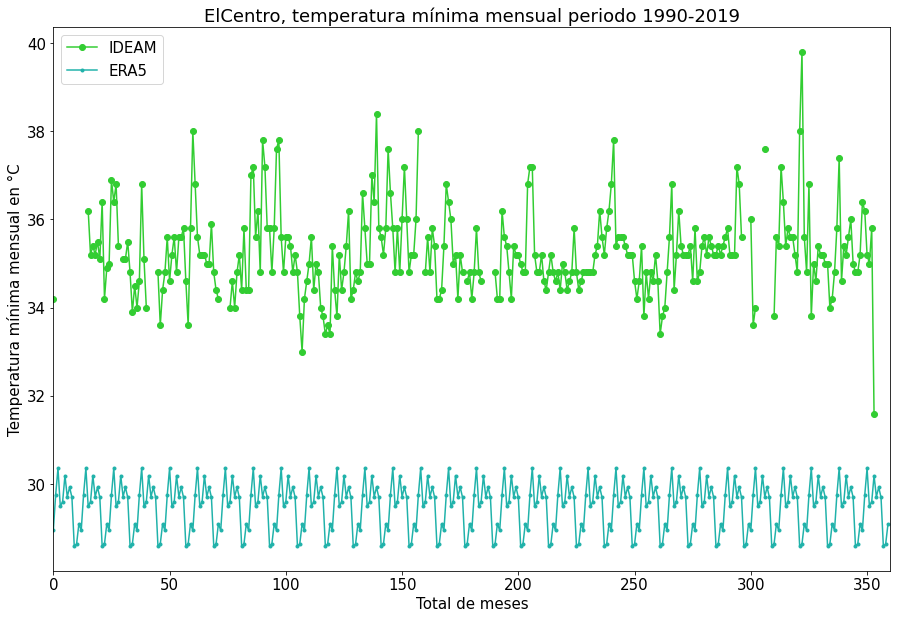

In [ ]:
font = {'family':'normal','weight':'normal','size':15}
matplotlib.rc('font',**font)
fig,ax = plt.subplots(figsize=(15,10))
ideam = dfTmin.iloc[:,12]
era5 = dfTmin.iloc[:,13]
ejex = np.arange(len(ideam))
ax.plot(ejex,ideam,'o',color='limegreen',linestyle='-',label='IDEAM')
ax.plot(ejex,era5,'.',color='lightseagreen',linestyle='-',label='ERA5')
ax.legend()
ax.set_xlabel('Total de meses')
ax.set_xlim(0,360)
# ax.set_ylim(0,top=None)
# ax.set_yticks([0,10,15,20,25,30,35,40])
ax.set_ylabel('Temperatura mínima mensual en °C')
ax.set_title('ElCentro, temperatura mínima mensual periodo 1990-2019')
#plt.savefig('fig1_lab.pdf') hay '.png' '.jpg' #Todas formas de guardar la figura, con resolución y demás. Queda en el drive.
plt.show()

In [ ]:
dfTmax = pd.read_excel('ElCentro_1990-2019.xlsx',sheet_name=1)

In [ ]:
dfTmax

,CodigoEstacion,NombreEstacion,Latitud,Longitud,Altitud,Departamento,Municipio,IdParametro,Etiqueta,Frecuencia,Fecha,IDEAM_K,IDEAM_C,ERA5_C,ERA5_K
0,23155040,CENTRO EL [23155040],6.859556,-73.765083,114,Santander,Barrancabermeja,TEMPERATURA,TMN_CON,Mensual,1990-01-30,292.35,19.2,22.580225,295.730225
1,23155040,CENTRO EL [23155040],6.859556,-73.765083,114,Santander,Barrancabermeja,TEMPERATURA,TMN_CON,Mensual,1990-02-01,NaN,NaN,22.500635,295.650635
2,23155040,CENTRO EL [23155040],6.859556,-73.765083,114,Santander,Barrancabermeja,TEMPERATURA,TMN_CON,Mensual,1990-03-01,NaN,NaN,23.247949,296.397949
3,23155040,CENTRO EL [23155040],6.859556,-73.765083,114,Santander,Barrancabermeja,TEMPERATURA,TMN_CON,Mensual,1990-04-01,NaN,NaN,23.120752,296.270752
4,23155040,CENTRO EL [23155040],6.859556,-73.765083,114,Santander,Barrancabermeja,TEMPERATURA,TMN_CON,Mensual,1990-05-01,NaN,NaN,23.598291,296.748291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,23155040,CENTRO EL [23155040],6.859556,-73.765083,114,Santander,Barrancabermeja,TEMPERATURA,TMN_CON,Mensual,2019-08-01,NaN,NaN,23.484766,296.634766
356,23155040,CENTRO EL [23155040],6.859556,-73.765083,114,Santander,Barrancabermeja,TEMPERATURA,TMN_CON,Mensual,2019-09-01,NaN,NaN,22.858057,296.008057
357,23155040,CENTRO EL [23155040],6.859556,-73.765083,114,Santander,Barrancabermeja,TEMPERATURA,TMN_CON,Mensual,2019-10-01,NaN,NaN,22.674463,295.824463
358,23155040,CENTRO EL [23155040],6.859556,-73.765083,114,Santander,Barrancabermeja,TEMPERATURA,TMN_CON,Mensual,2019-11-01,NaN,NaN,22.857813,296.007812


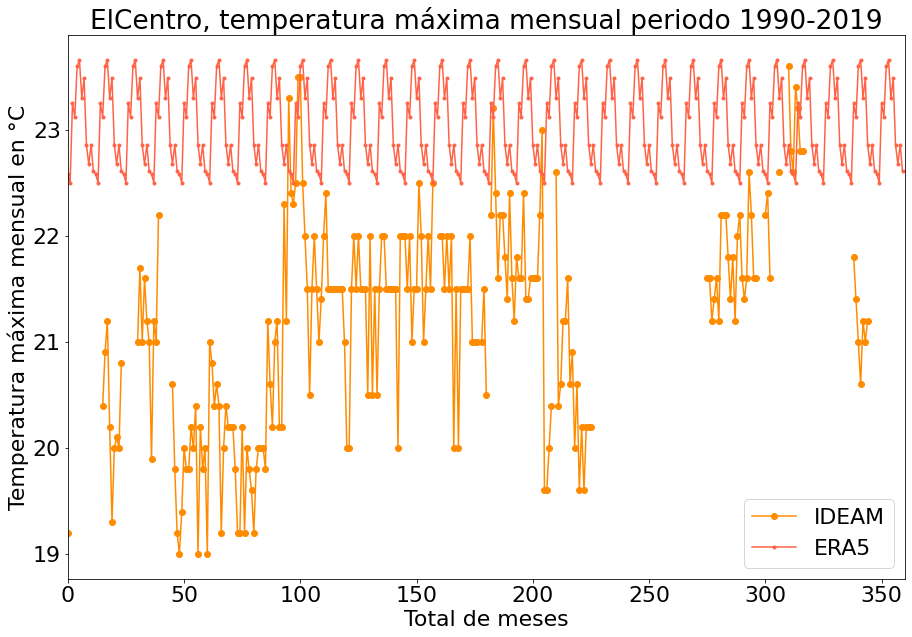

In [ ]:
font = {'family':'normal','weight':'normal','size':22}
matplotlib.rc('font',**font)
fig,ax = plt.subplots(figsize=(15,10))
ideam = dfTmax.iloc[:,12]
era5 = dfTmax.iloc[:,13]
ejex = np.arange(len(ideam))
ax.plot(ejex,ideam,'o',color='darkorange',linestyle='-',label='IDEAM')
ax.plot(ejex,era5,'.',color='tomato',linestyle='-',label='ERA5')
ax.legend()
ax.set_xlabel('Total de meses')
ax.set_xlim(0,360)
# ax.set_ylim(0,top=None)
# ax.set_yticks([0,10,15,20,25,30,35,40])
ax.set_ylabel('Temperatura máxima mensual en °C')
ax.set_title('ElCentro, temperatura máxima mensual periodo 1990-2019')
#plt.savefig('fig1_lab.pdf') hay '.png' '.jpg' #Todas formas de guardar la figura, con resolución y demás. Queda en el drive.
plt.show()

#ESTACIÓN AEROPUERTO VASQUEZ COBO, LETICIA

In [ ]:
#Primero: cargar el Drive:
from google.colab import drive
drive.mount('/content/Mdrive')
%cd /content/Mdrive/MyDrive/mgual/Geoinfo/Tesis/Analisis_Anual/Entrega_2/Amazonia/
! pwd

Drive already mounted at /content/Mdrive; to attempt to forcibly remount, call drive.mount("/content/Mdrive", force_remount=True).
/content/Mdrive/MyDrive/mgual/Geoinfo/Tesis/Analisis_Anual/Entrega_2/Amazonia
/content/Mdrive/MyDrive/mgual/Geoinfo/Tesis/Analisis_Anual/Entrega_2/Amazonia


In [ ]:
df = pd.read_excel('Leticia_1990-2019.xlsx')

In [ ]:
df

,CodigoEstacion,NombreEstacion,Latitud,Longitud,Altitud,Municipio,IdParametro,Fecha,IDEAM,ERA5
0,48015050,AEROPUERTO VASQUEZ COBO [48015050],-4.193861,-69.940917,84,Leticia,PRECIPITACION,1990/01,328.4,256.693522
1,48015050,AEROPUERTO VASQUEZ COBO [48015050],-4.193861,-69.940917,84,Leticia,PRECIPITACION,1990/02,327.7,285.585538
2,48015050,AEROPUERTO VASQUEZ COBO [48015050],-4.193861,-69.940917,84,Leticia,PRECIPITACION,1990/03,412.6,332.511116
3,48015050,AEROPUERTO VASQUEZ COBO [48015050],-4.193861,-69.940917,84,Leticia,PRECIPITACION,1990/04,376.0,285.209790
4,48015050,AEROPUERTO VASQUEZ COBO [48015050],-4.193861,-69.940917,84,Leticia,PRECIPITACION,1990/05,353.0,309.680122
...,...,...,...,...,...,...,...,...,...,...
355,48015050,AEROPUERTO VASQUEZ COBO [48015050],-4.193861,-69.940917,84,Leticia,PRECIPITACION,2019/08,112.1,147.094049
356,48015050,AEROPUERTO VASQUEZ COBO [48015050],-4.193861,-69.940917,84,Leticia,PRECIPITACION,2019/09,110.8,299.373418
357,48015050,AEROPUERTO VASQUEZ COBO [48015050],-4.193861,-69.940917,84,Leticia,PRECIPITACION,2019/10,351.0,359.859575
358,48015050,AEROPUERTO VASQUEZ COBO [48015050],-4.193861,-69.940917,84,Leticia,PRECIPITACION,2019/11,0.0,323.543437


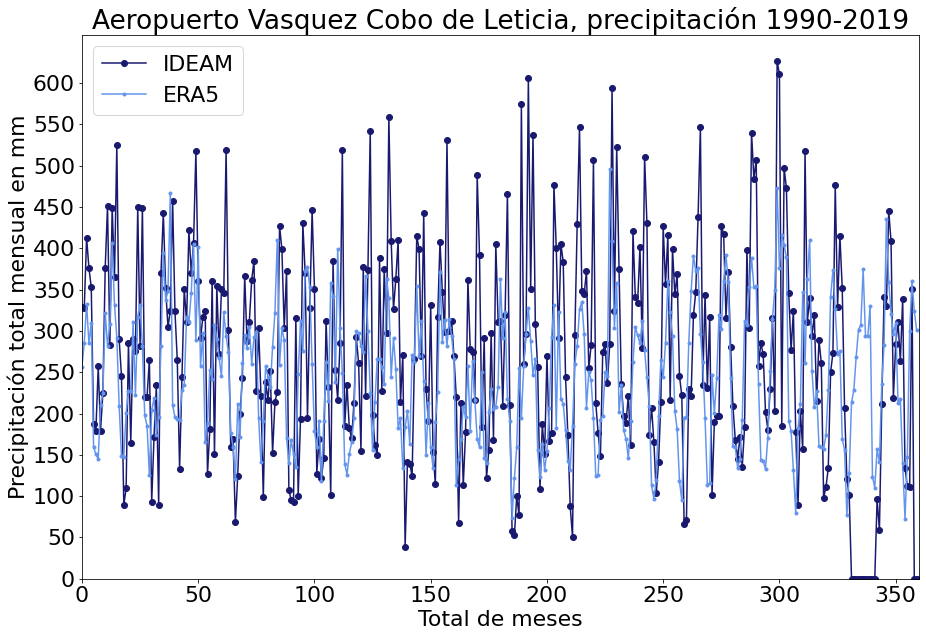

In [ ]:
font = {'family':'normal','weight':'normal','size':22}
matplotlib.rc('font',**font)
fig,ax = plt.subplots(figsize=(15,10))
ideam = df.iloc[:,8]
era5 = df.iloc[:,9]
ejex = np.arange(len(ideam))
ax.plot(ejex,ideam,'o',color='midnightblue',linestyle='-',label='IDEAM')
ax.plot(ejex,era5,'.',color='cornflowerblue',linestyle='-',label='ERA5')
ax.legend()
ax.set_xlabel('Total de meses')
ax.set_xlim(0,360)
ax.set_ylim(0,top=None)
ax.set_yticks([0,50,100,150,200,250,300,350,400,450,500,550,600])
ax.set_ylabel('Precipitación total mensual en mm')
ax.set_title('Aeropuerto Vasquez Cobo de Leticia, precipitación 1990-2019')
#plt.savefig('fig1_lab.pdf') hay '.png' '.jpg' #Todas formas de guardar la figura, con resolución y demás. Queda en el drive.
plt.show()

In [ ]:
dfTmin = pd.read_excel('Leticia_1990-2019.xlsx',sheet_name=1)

In [ ]:
dfTmin

,CodigoEstacion,NombreEstacion,Latitud,Longitud,Altitud,Municipio,DescripcionSerie,Frecuencia,Fecha,IDEAM_K,IDEAM_C,ERA5_C,ERA5_K
0,48015050,AEROPUERTO VASQUEZ COBO [48015050],"-4,19386111","-69,94091667",84,Leticia,T_Minima,Mensual,1990/01,295.15,22.0,23.280775,296.430775
1,48015050,AEROPUERTO VASQUEZ COBO [48015050],"-4,19386111","-69,94091667",84,Leticia,T_Minima,Mensual,1990/02,294.05,20.9,23.449297,296.599297
2,48015050,AEROPUERTO VASQUEZ COBO [48015050],"-4,19386111","-69,94091667",84,Leticia,T_Minima,Mensual,1990/03,NaN,NaN,23.438600,296.588600
3,48015050,AEROPUERTO VASQUEZ COBO [48015050],"-4,19386111","-69,94091667",84,Leticia,T_Minima,Mensual,1990/04,294.55,21.4,23.487516,296.637516
4,48015050,AEROPUERTO VASQUEZ COBO [48015050],"-4,19386111","-69,94091667",84,Leticia,T_Minima,Mensual,1990/05,293.65,20.5,23.180318,296.330318
...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,48015079,AEROPUERTO VASQUEZ COBO [48015050],"-4,19386140","-69,94091696",113,Leticia,T_Minima,Mensual,2019/8,NaN,NaN,22.485925,295.635925
356,48015080,AEROPUERTO VASQUEZ COBO [48015050],"-4,19386141","-69,94091697",114,Leticia,T_Minima,Mensual,2019/9,NaN,NaN,22.655664,295.805664
357,48015081,AEROPUERTO VASQUEZ COBO [48015050],"-4,19386142","-69,94091698",115,Leticia,T_Minima,Mensual,2019/10,NaN,NaN,23.597162,296.747162
358,48015082,AEROPUERTO VASQUEZ COBO [48015050],"-4,19386143","-69,94091699",116,Leticia,T_Minima,Mensual,2019/11,NaN,NaN,23.616102,296.766102


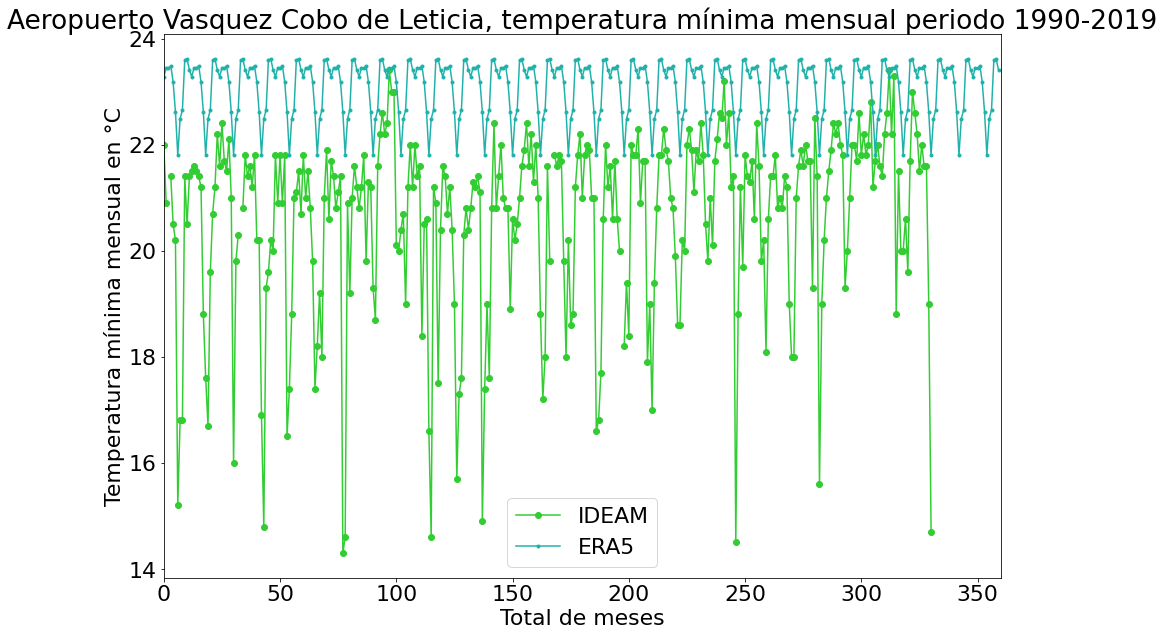

In [ ]:
font = {'family':'normal','weight':'normal','size':22}
matplotlib.rc('font',**font)
fig,ax = plt.subplots(figsize=(15,10))
ideam = dfTmin.iloc[:,10]
era5 = dfTmin.iloc[:,11]
ejex = np.arange(len(ideam))
ax.plot(ejex,ideam,'o',color='limegreen',linestyle='-',label='IDEAM')
ax.plot(ejex,era5,'.',color='lightseagreen',linestyle='-',label='ERA5')
ax.legend()
ax.set_xlabel('Total de meses')
ax.set_xlim(0,360)
# ax.set_ylim(0,top=None)
# ax.set_yticks([0,10,15,20,25,30,35,40])
ax.set_ylabel('Temperatura mínima mensual en °C')
ax.set_title('Aeropuerto Vasquez Cobo de Leticia, temperatura mínima mensual periodo 1990-2019')
#plt.savefig('fig1_lab.pdf') hay '.png' '.jpg' #Todas formas de guardar la figura, con resolución y demás. Queda en el drive.
plt.show()

In [ ]:
dfTmax = pd.read_excel('Leticia_1990-2019.xlsx',sheet_name=2)

In [ ]:
dfTmax

,CodigoEstacion,NombreEstacion,Latitud,Longitud,Altitud,Municipio,DescripcionSerie,Frecuencia,Fecha,IDEAM_K,IDEAM_C,ERA5_C,ERA5_K
0,48015050,AEROPUERTO VASQUEZ COBO [48015050],"-4,19386111","-69,94091667",84,Leticia,T_Maxima,Mensual,1990/01,305.15,32.0,29.137354,302.287354
1,48015050,AEROPUERTO VASQUEZ COBO [48015050],"-4,19386111","-69,94091667",84,Leticia,T_Maxima,Mensual,1990/02,307.05,33.9,29.408197,302.558197
2,48015050,AEROPUERTO VASQUEZ COBO [48015050],"-4,19386111","-69,94091667",84,Leticia,T_Maxima,Mensual,1990/03,NaN,NaN,29.600381,302.750381
3,48015050,AEROPUERTO VASQUEZ COBO [48015050],"-4,19386111","-69,94091667",84,Leticia,T_Maxima,Mensual,1990/04,309.35,36.2,29.790559,302.940559
4,48015050,AEROPUERTO VASQUEZ COBO [48015050],"-4,19386111","-69,94091667",84,Leticia,T_Maxima,Mensual,1990/05,306.75,33.6,28.665403,301.815403
...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,48015079,AEROPUERTO VASQUEZ COBO [48015050],"-4,19386140","-69,94091696",113,Leticia,T_Maxima,Mensual,2019/08,NaN,NaN,28.968896,302.118896
356,48015080,AEROPUERTO VASQUEZ COBO [48015050],"-4,19386141","-69,94091697",114,Leticia,T_Maxima,Mensual,2019/09,NaN,NaN,29.254976,302.404976
357,48015081,AEROPUERTO VASQUEZ COBO [48015050],"-4,19386142","-69,94091698",115,Leticia,T_Maxima,Mensual,2019/10,NaN,NaN,30.115030,303.265030
358,48015082,AEROPUERTO VASQUEZ COBO [48015050],"-4,19386143","-69,94091699",116,Leticia,T_Maxima,Mensual,2019/11,NaN,NaN,29.564340,302.714340


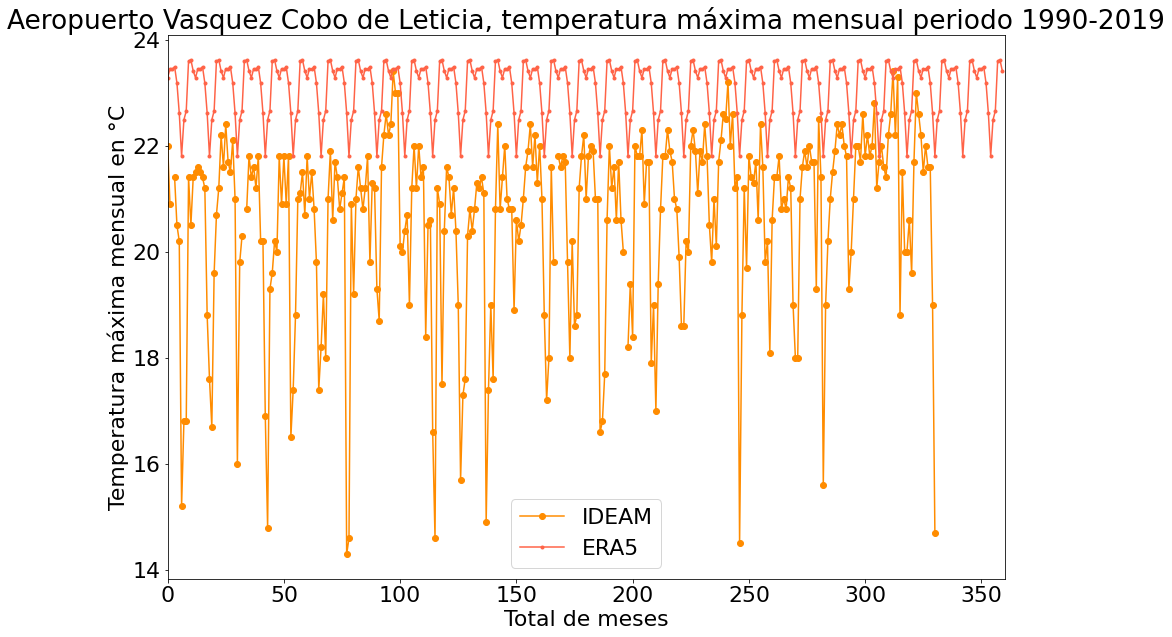

In [ ]:
font = {'family':'normal','weight':'normal','size':22}
matplotlib.rc('font',**font)
fig,ax = plt.subplots(figsize=(15,10))
ideam = dfTmin.iloc[:,10]
era5 = dfTmin.iloc[:,11]
ejex = np.arange(len(ideam))
ax.plot(ejex,ideam,'o',color='darkorange',linestyle='-',label='IDEAM')
ax.plot(ejex,era5,'.',color='tomato',linestyle='-',label='ERA5')
ax.legend()
ax.set_xlabel('Total de meses')
ax.set_xlim(0,360)
# ax.set_ylim(0,top=None)
# ax.set_yticks([0,10,15,20,25,30,35,40])
ax.set_ylabel('Temperatura máxima mensual en °C')
ax.set_title('Aeropuerto Vasquez Cobo de Leticia, temperatura máxima mensual periodo 1990-2019')
#plt.savefig('fig1_lab.pdf') hay '.png' '.jpg' #Todas formas de guardar la figura, con resolución y demás. Queda en el drive.
plt.show()

#ESTACIÓN NOANAMA, MEDIO SAN JUAN, CHOCÓ

In [ ]:
#Primero: cargar el Drive:
from google.colab import drive
drive.mount('/content/Mdrive')
%cd /content/Mdrive/MyDrive/mgual/Geoinfo/Tesis/Analisis_Anual/Entrega_2/Pacifica/
! pwd

Drive already mounted at /content/Mdrive; to attempt to forcibly remount, call drive.mount("/content/Mdrive", force_remount=True).
/content/Mdrive/MyDrive/mgual/Geoinfo/Tesis/Analisis_Anual/Entrega_2/Pacifica
/content/Mdrive/MyDrive/mgual/Geoinfo/Tesis/Analisis_Anual/Entrega_2/Pacifica


In [ ]:
df = pd.read_excel('Noanama_1990-2019.xlsx')

In [ ]:
df

,CodigoEstacion,NombreEstacion,Latitud,Longitud,Altitud,Municipio,IdParametro,Fecha,IDEAM,ERA5,Fecha.1
0,54085010,NOANAMA [54085010],4.68819,-76.93425,28,Medio San Juan,PRECIPITACION,1990/01,575.1,322.589424,1990/01
1,54085010,NOANAMA [54085010],4.68819,-76.93425,28,Medio San Juan,PRECIPITACION,1990/02,338.8,293.827757,1990/02
2,54085010,NOANAMA [54085010],4.68819,-76.93425,28,Medio San Juan,PRECIPITACION,1990/03,451.2,740.753058,1990/03
3,54085010,NOANAMA [54085010],4.68819,-76.93425,28,Medio San Juan,PRECIPITACION,1990/04,548.1,626.781397,1990/04
4,54085010,NOANAMA [54085010],4.68819,-76.93425,28,Medio San Juan,PRECIPITACION,1990/05,822.3,680.336334,1990/05
...,...,...,...,...,...,...,...,...,...,...,...
355,54085048,NOANAMA [54085010],4.68819,-76.93425,28,Medio San Juan,PRECIPITACION,2019/08,NaN,757.876564,2019/08
356,54085049,NOANAMA [54085010],4.68819,-76.93425,28,Medio San Juan,PRECIPITACION,2019/09,NaN,759.647302,2019/09
357,54085050,NOANAMA [54085010],4.68819,-76.93425,28,Medio San Juan,PRECIPITACION,2019/10,NaN,745.991874,2019/10
358,54085051,NOANAMA [54085010],4.68819,-76.93425,28,Medio San Juan,PRECIPITACION,2019/10,789.9,540.818382,2019/11


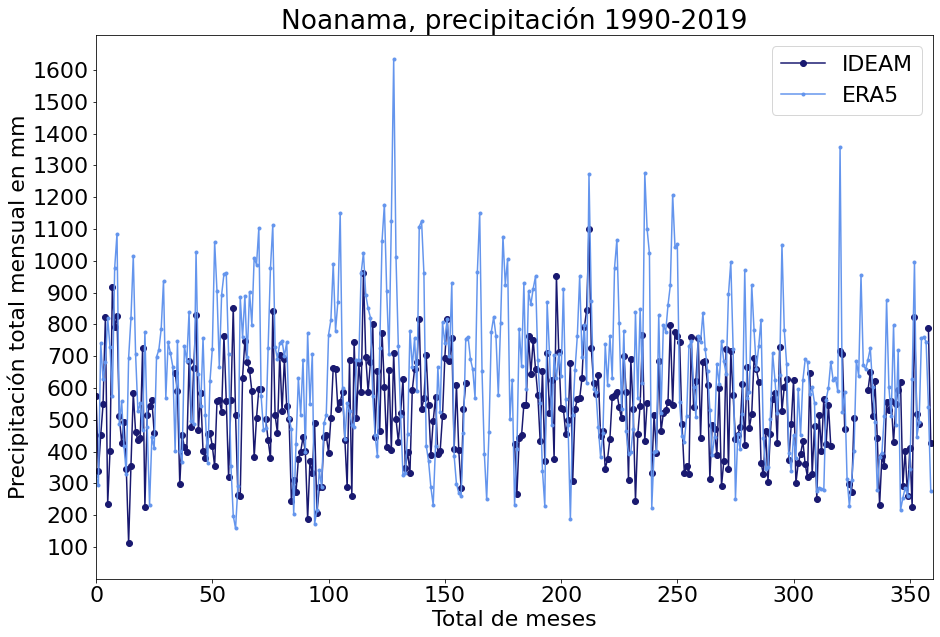

In [ ]:
font = {'family':'normal','weight':'normal','size':22}
matplotlib.rc('font',**font)
fig,ax = plt.subplots(figsize=(15,10))
ideam = df.iloc[:,8]
era5 = df.iloc[:,9]
ejex = np.arange(len(ideam))
ax.plot(ejex,ideam,'o',color='midnightblue',linestyle='-',label='IDEAM')
ax.plot(ejex,era5,'.',color='cornflowerblue',linestyle='-',label='ERA5')
ax.legend()
ax.set_xlabel('Total de meses')
ax.set_xlim(0,360)
ax.set_ylim(0,top=None)
ax.set_yticks([100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600])
ax.set_ylabel('Precipitación total mensual en mm')
ax.set_title('Noanama, precipitación 1990-2019')
#plt.savefig('fig1_lab.pdf') hay '.png' '.jpg' #Todas formas de guardar la figura, con resolución y demás. Queda en el drive.
plt.show()

#TEMPERATURAS

In [ ]:
dfTmin = pd.read_excel('Noanama_1990-2019.xlsx',sheet_name=1)

In [ ]:
dfTmin

,CodigoEstacion,NombreEstacion,Latitud,Longitud,Altitud,Municipio,DescripcionSerie,Frecuencia,Fecha,IDEAM_K,IDEAM_C,ERA5_C,Mínimo,Fecha.1
0,54085010,NOANAMA [54085010],4.68819,-76.93425,28,Medio San Juan,T_minima,Mensual,1990/01,294.15,21.0,22.511133,295.661133,1990/01
1,54085011,NOANAMA [54085010],4.68819,-76.93425,28,Medio San Juan,T_minima,Mensual,1990/02,294.35,21.2,22.633203,295.783203,1990/02
2,54085012,NOANAMA [54085010],4.68819,-76.93425,28,Medio San Juan,T_minima,Mensual,1990/03,294.55,21.4,23.211572,296.361572,1990/03
3,54085013,NOANAMA [54085010],4.68819,-76.93425,28,Medio San Juan,T_minima,Mensual,1990/04,293.15,20.0,22.883203,296.033203,1990/04
4,54085014,NOANAMA [54085010],4.68819,-76.93425,28,Medio San Juan,T_minima,Mensual,1990/05,294.75,21.6,23.071924,296.221924,1990/05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,54085056,NOANAMA [54085010],4.68819,-76.93425,28,Medio San Juan,T_minima,Mensual,2019/08,293.35,20.2,22.640039,295.790039,2019/08
356,54085057,NOANAMA [54085010],4.68819,-76.93425,28,Medio San Juan,T_minima,Mensual,2019/09,NaN,NaN,22.590967,295.740967,2019/09
357,54085058,NOANAMA [54085010],4.68819,-76.93425,28,Medio San Juan,T_minima,Mensual,2019/10,293.15,20.0,22.419824,295.569824,2019/10
358,54085059,NOANAMA [54085010],4.68819,-76.93425,28,Medio San Juan,T_minima,Mensual,2019/11,300.15,27.0,22.484766,295.634766,2019/11


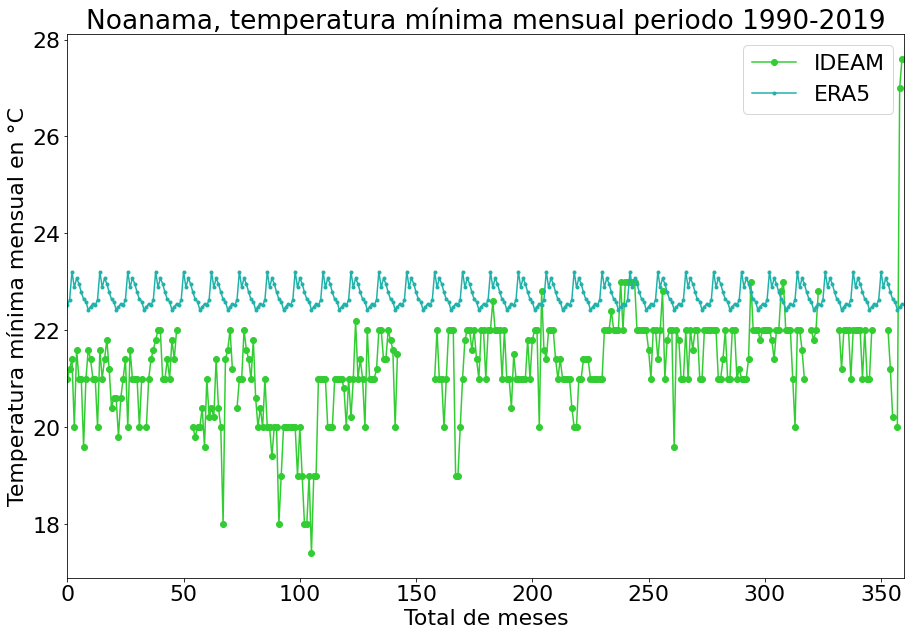

In [ ]:
font = {'family':'normal','weight':'normal','size':22}
matplotlib.rc('font',**font)
fig,ax = plt.subplots(figsize=(15,10))
ideam = dfTmin.iloc[:,10]
era5 = dfTmin.iloc[:,11]
ejex = np.arange(len(ideam))
ax.plot(ejex,ideam,'o',color='limegreen',linestyle='-',label='IDEAM')
ax.plot(ejex,era5,'.',color='lightseagreen',linestyle='-',label='ERA5')
ax.legend()
ax.set_xlabel('Total de meses')
ax.set_xlim(0,360)
# ax.set_ylim(0,top=None)
# ax.set_yticks([0,10,15,20,25,30,35,40])
ax.set_ylabel('Temperatura mínima mensual en °C')
ax.set_title('Noanama, temperatura mínima mensual periodo 1990-2019')
#plt.savefig('fig1_lab.pdf') hay '.png' '.jpg' #Todas formas de guardar la figura, con resolución y demás. Queda en el drive.
plt.show()

In [ ]:
dfTmax = pd.read_excel('Noanama_1990-2019.xlsx',sheet_name=2)

In [ ]:
dfTmax

,CodigoEstacion,NombreEstacion,Latitud,Longitud,Altitud,Municipio,DescripcionSerie,Frecuencia,Fecha,IDEAM_K,IDEAM_C,ERA5_C,ERA5_K,Fecha.1
0,54085010,NOANAMA [54085010],4.68819,-76.93425,28,Medio San Juan,T_maxima,Mensual,1990/01,305.15,32.0,27.984033,301.134033,1990/01
1,54085011,NOANAMA [54085010],4.68819,-76.93425,28,Medio San Juan,T_maxima,Mensual,1990/02,306.15,33.0,28.979639,302.129639,1990/02
2,54085012,NOANAMA [54085010],4.68819,-76.93425,28,Medio San Juan,T_maxima,Mensual,1990/03,306.55,33.4,29.161035,302.311035,1990/03
3,54085013,NOANAMA [54085010],4.68819,-76.93425,28,Medio San Juan,T_maxima,Mensual,1990/04,306.55,33.4,28.074121,301.224121,1990/04
4,54085014,NOANAMA [54085010],4.68819,-76.93425,28,Medio San Juan,T_maxima,Mensual,1990/05,306.15,33.0,28.375146,301.525146,1990/05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,54085365,NOANAMA [54085010],4.68819,-76.93425,28,Medio San Juan,T_maxima,Mensual,2019/08,306.15,33.0,27.716211,300.866211,2019/08
356,54085366,NOANAMA [54085010],4.68819,-76.93425,28,Medio San Juan,T_maxima,Mensual,2019/09,NaN,NaN,27.307031,300.457031,2019/09
357,54085367,NOANAMA [54085010],4.68819,-76.93425,28,Medio San Juan,T_maxima,Mensual,2019/10,306.15,33.0,26.847803,299.997803,2019/10
358,54085368,NOANAMA [54085010],4.68819,-76.93425,28,Medio San Juan,T_maxima,Mensual,2019/11,304.15,31.0,26.889063,300.039062,2019/11


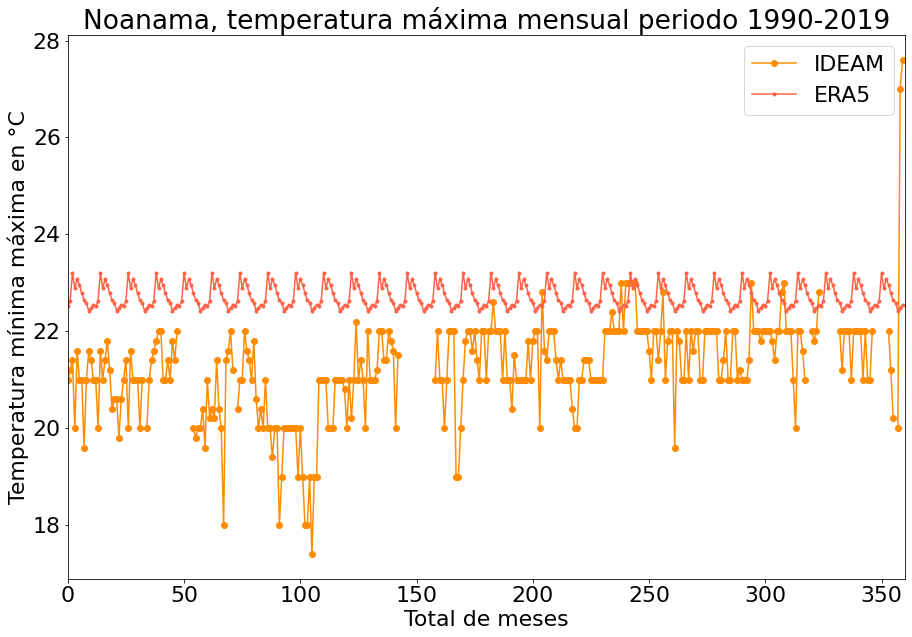

In [ ]:
font = {'family':'normal','weight':'normal','size':22}
matplotlib.rc('font',**font)
fig,ax = plt.subplots(figsize=(15,10))
ideam = dfTmin.iloc[:,10]
era5 = dfTmin.iloc[:,11]
ejex = np.arange(len(ideam))
ax.plot(ejex,ideam,'o',color='darkorange',linestyle='-',label='IDEAM')
ax.plot(ejex,era5,'.',color='tomato',linestyle='-',label='ERA5')
ax.legend()
ax.set_xlabel('Total de meses')
ax.set_xlim(0,360)
# ax.set_ylim(0,top=None)
# ax.set_yticks([0,10,15,20,25,30,35,40])
ax.set_ylabel('Temperatura mínima máxima en °C')
ax.set_title('Noanama, temperatura máxima mensual periodo 1990-2019')
#plt.savefig('fig1_lab.pdf') hay '.png' '.jpg' #Todas formas de guardar la figura, con resolución y demás. Queda en el drive.
plt.show()